In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SensorConnectData_fastnslow.csv",skiprows=30)

In [3]:
type(data['Time'])
data['Time']=pd.to_datetime(data['Time'])
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz']
print(data.columns)
data.head()

Index(['Time', 'inertial-6253.106810:scaledAccelX',
       'inertial-6253.106810:scaledAccelY',
       'inertial-6253.106810:scaledAccelZ', 'inertial-6253.106810:scaledGyroX',
       'inertial-6253.106810:scaledGyroY', 'inertial-6253.106810:scaledGyroZ',
       'inertial-6253.106810:deltaThetaX', 'inertial-6253.106810:deltaThetaY',
       'inertial-6253.106810:deltaThetaZ', 'inertial-6253.106810:deltaVelX',
       'inertial-6253.106810:deltaVelY', 'inertial-6253.106810:deltaVelZ'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz'],
      dtype='object')


,Time,gx,gy,gz,gyx,gyy,gyz,thetax,thetay,thetaz,vx,vy,vz
0,2022-07-13 10:37:37.453276,0.945553,0.348379,-0.434298,-0.226261,0.969430,0.602190,-0.002236,0.009503,0.005938,0.009427,0.003536,-0.004403
1,2022-07-13 10:37:37.463275,0.901161,0.345753,-0.455962,-0.187025,0.842937,0.539810,-0.001824,0.008248,0.005283,0.008931,0.003437,-0.004620
2,2022-07-13 10:37:37.473276,0.872313,0.345597,-0.464276,-0.127847,0.725312,0.505164,-0.001211,0.007085,0.004919,0.008632,0.003475,-0.004695
3,2022-07-13 10:37:37.483273,0.876815,0.369927,-0.462890,-0.088266,0.603524,0.488553,-0.000808,0.005895,0.004944,0.008738,0.003721,-0.004663
4,2022-07-13 10:37:37.493272,0.876794,0.417095,-0.461940,-0.052705,0.470928,0.416008,-0.000482,0.004527,0.004096,0.008758,0.004236,-0.004624


[]

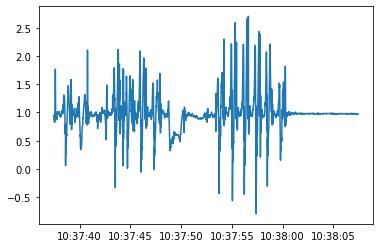

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['Time'],data['gx'])
plt.plot()

[]

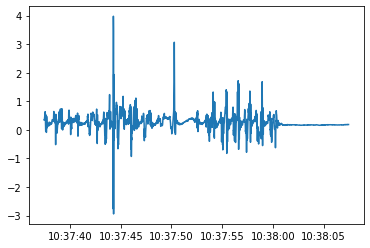

In [5]:
plt.plot(data['Time'],data['gy'])
plt.plot()

[]

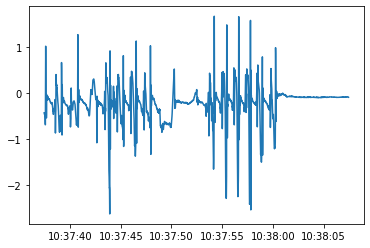

In [6]:
plt.plot(data['Time'],data['gz'])
plt.plot()

[]

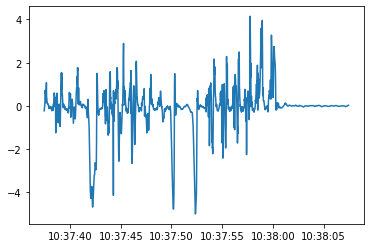

In [7]:
plt.plot(data['Time'],data['gyx'])
plt.plot()

[]

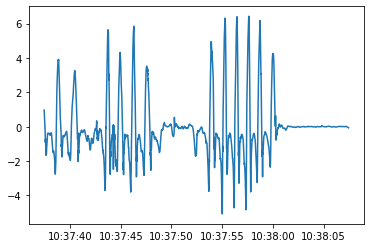

In [8]:
plt.plot(data['Time'],data['gyy'])
plt.plot()

[]

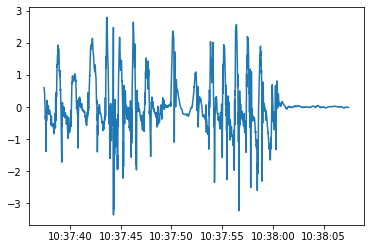

In [9]:
plt.plot(data['Time'],data['gyz'])
plt.plot()

In [10]:
import statistics
from statistics import variance
from fractions import Fraction as fr


In [11]:
m=(np.var(data['gx'])+np.var(data['gy'])+np.var(data['gz']))
print(m)
n=(np.var(data['gyx'])+np.var(data['gyy'])+np.var(data['gyz']))
print(n)

0.32001993293570874
4.49637248373104


0       1.097293
1       1.067491
2       1.046862
3       1.058262
4       1.075232
          ...   
2995    0.996627
2996    0.999135
2997    1.001837
2998    0.998306
2999    0.998245
Name: Acceleration, Length: 3000, dtype: float64


[]

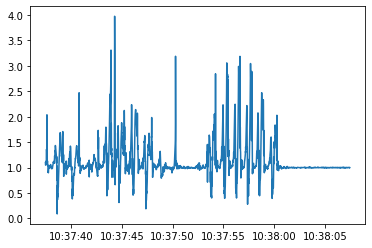

In [12]:
data['Acceleration']= pow(pow((data['gx']),2)+pow((data['gy']),2)+pow((data['gz']),2),0.5)
print(data['Acceleration'])
plt.plot(data['Time'],data['Acceleration'])
plt.plot()


0       1.163452
1       1.018291
2       0.893092
3       0.781483
4       0.630566
          ...   
2995    0.056972
2996    0.060645
2997    0.068069
2998    0.072267
2999    0.075233
Name: Gyroscope, Length: 3000, dtype: float64
2.4880952291727687


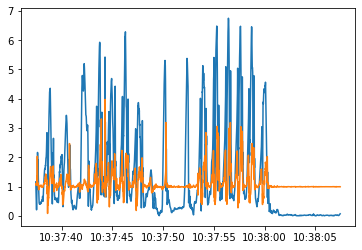

In [13]:
data['Gyroscope']= pow(pow((data['gyx']),2)+pow((data['gyy']),2)+pow((data['gyz']),2),0.5)
print(data['Gyroscope'])
plt.plot(data['Time'],data['Gyroscope'],data['Time'],data['Acceleration'])
print(np.var(data['Gyroscope']))

In [14]:
arr1= np.array([data['gyx'],data['gyy'],data['gyz']])
arr2=np.array([data['gyx']])
arr3=np.array([data['gyy']])
arr4=np.array([data['gyz']])
print(np.var(arr1))
print(arr1.shape)
print(np.cov(arr1))
mean1= np.mean(data['gyx'])
mean2= np.mean(data['gyy'])
mean3= np.mean(data['gyz'])
print(np.var(arr2))
print(np.var(arr3))
print(np.var(arr4))
covxy=(sum(np.absolute((data['gyx']-mean1)*(data['gyy']-mean2))))/300
print(covxy)
covxz=(sum((data['gyx']-mean1)*(data['gyz']-mean3)))/300
print(covxz)
covyz=(sum((data['gyy']-mean2)*(data['gyz']-mean3)))/300
print(covyz)





1.5021999521389124
(3, 3000)
[[ 1.02721037 -0.0819306  -0.34828148]
 [-0.0819306   2.89953838  0.85305329]
 [-0.34828148  0.85305329  0.57112302]]
1.026867966698806
2.898571870948559
0.5709326460836724
8.622712497680281
-3.481653866314542
8.52768942668043


In [15]:
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz','acc','gyro']
print(data.columns)

Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'Acceleration', 'Gyroscope'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'acc', 'gyro'],
      dtype='object')


In [16]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'],data['thetax'],data['thetay'],data['thetaz'],data['vx'],data['vy'],data['vz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)
data['Time']=pd.to_datetime(data['Time'])


[[ 1.          0.20185889 -0.09046866  0.07444351  0.08111768 -0.04664122
   0.07588301  0.07499066 -0.05729847  0.98531984  0.19316985 -0.08050151]
 [ 0.20185889  1.         -0.35099289 -0.05354889  0.03885859 -0.0538984
  -0.04463383  0.03286264 -0.05343858  0.17146123  0.98430991 -0.3454004 ]
 [-0.09046866 -0.35099289  1.         -0.13090702 -0.07902316  0.08431389
  -0.13479859 -0.06942596  0.08638434 -0.06617001 -0.33133512  0.99640605]
 [ 0.07444351 -0.05354889 -0.13090702  1.         -0.04747358 -0.45471141
   0.99824164 -0.047761   -0.45055761  0.08288583 -0.05212981 -0.11873416]
 [ 0.08111768  0.03885859 -0.07902316 -0.04747358  1.          0.66289829
  -0.04673317  0.99975874  0.6486841   0.07655957  0.05028234 -0.10613849]
 [-0.04664122 -0.0538984   0.08431389 -0.45471141  0.66289829  1.
  -0.45388583  0.66405439  0.99631066 -0.04933165 -0.05863761  0.06584165]
 [ 0.07588301 -0.04463383 -0.13479859  0.99824164 -0.04673317 -0.45388583
   1.         -0.0467566  -0.45207795  0.

In [17]:
mean4=np.mean(data['gx'])
mean5=np.mean(data['gy'])
corrxy= sum((data['gx']-mean4)*(data['gy']-mean5))/(pow(sum(pow((data['gx']-mean4),2))*sum(pow((data['gy']-mean5),2)),0.5))
print(corrxy)
data['v']=data['vx']*data['vx']+data['vy']*data['vy']+data['vz']*data['vz']

0.20185888761918477


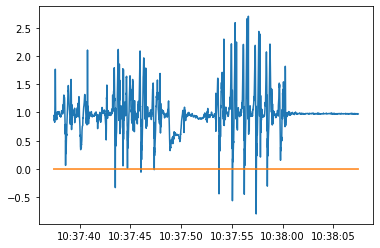

In [18]:
plt.plot(data['Time'],data['gx'],data['Time'],data['v'])

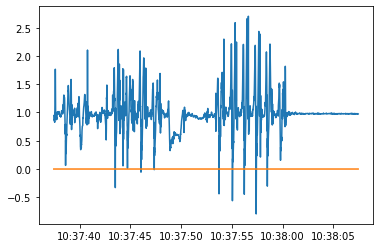

In [19]:
mean=(data['v'][0]+data['v'][1]+data['v'][2])/3
arr_vthresh= np.array(mean)
i=2;
while(i<=2998):
    mean=(data['v'][i-1]+data['v'][i]+data['v'][i+1])/3
    arr_vthresh=np.append(arr_vthresh,mean)
    i=i+1
arr_vthresh=np.append(arr_vthresh,mean)
arr_vthresh=np.append(arr_vthresh,mean)
data['vmean']=arr_vthresh
plt.plot(data['Time'], data['gx'], data['Time'],abs(data['vmean']-data['v']))

In [20]:

# #data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
# plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
# from sklearn.metrics import accuracy_score
# print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.009089220780879207


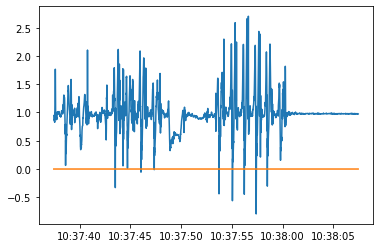

In [21]:
mean= data['vx'][0:10].sum()
mean=mean/10

mean2= data['vx'][344:354].sum()
mean2=mean2/10

mean=(mean+mean2)/2
print(mean)
i=1
arr= np.array([sum(pow((data['vx'][0:10]-mean),2))/10])
while(i<=2999):
    var1= sum(pow((data['vx'][i:(i+10)]-mean),2))/10
    i+=1
    arr=np.append(arr,var1)

np.shape(arr)
data['Var']=arr
plt.plot(data['Time'],data['gx'],data['Time'],data['Var'])
    

In [22]:
#data['acc_thresh']=((data['acc'] >= 0.97895) & (data['acc']<= 1.033))
#plt.plot(data['Time'],data['mark_stance5'],data['Time'],data['acc_thresh'])

In [23]:
from sklearn.metrics import accuracy_score
#accuracy_score(data['mark_stance'], data['acc_thresh'])

In [24]:
# arr_accthresh= np.array([data['acc'][0]])
# i=1;
# while(i<=2997):
#     mean=(data['acc'][i-1]+data['acc'][i]+data['acc'][i+1])/3
#     arr_accthresh=np.append(arr_accthresh,mean)
#     i=i+1
# arr_accthresh=np.append(arr_accthresh,data['acc'][354])
# data['accmean']=arr_accthresh
# plt.plot(data['Time'], data['accmean'], data['Time'],data['mark_stance5'])
    

In [25]:
#data['acc_thresh2']=((data['accmean'] >= 0.9876) & (data['accmean']<= 1.04))


In [26]:
#accuracy_score(data['mark_stance'], data['acc_thresh2'])

In [27]:
# plt.plot(data['Time'], data['mark_stance'], data['Time'], data['accmean'])
# plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# # Show the minor grid as well. Style it in very light gray as a thin,
# # dotted line.
# plt.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.25)
# # Make the minor ticks and gridlines show.
# plt.minorticks_on()

3.054466826258739e-07


<ipython-input-28-2d5dd28078af>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=0
<ipython-input-28-2d5dd28078af>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=1


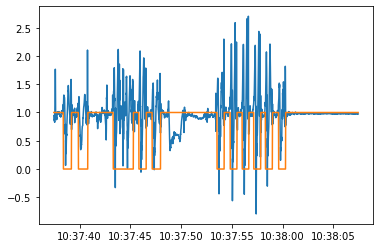

In [28]:

import math
sigma2= 3.054466826258739e-07
print(sigma2)
x=math.log10((pow(data['acc'][0]-1,2)+pow(data['acc'][1]-1,2)+pow(data['acc'][2]-1,2)+pow(data['acc'][3]-1,2)+pow(data['acc'][4]-1,2))/(5*sigma2))
arr_tm = np.array(x)
arr_tm = np.array(x)
i=2;
while(i<=2997):
    x=math.log10((pow(data['acc'][i-1]-1,2)+pow(data['acc'][i-2]-1,2)+pow(data['acc'][i+2]-1,2)+pow(data['acc'][i+1]-1,2)+pow(data['acc'][i]-1,2))/(5*sigma2))
    arr_tm=np.append(arr_tm,x)
    i+=1
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
data['tm1']=arr_tm

data['mark_stance1']=(data['tm1']<5.5)
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance1'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<30):
                while(k<=j):
                    data['mark_stance1'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance1'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<30):
                while(k<=j):
                    data['mark_stance1'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance1'])

    
    

<ipython-input-39-5077c63b6627>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=0
<ipython-input-39-5077c63b6627>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=1


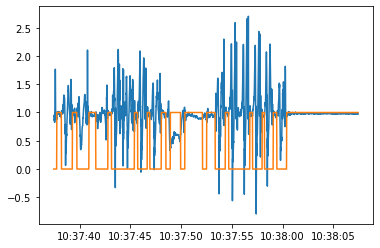

In [39]:

x=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2))/(5)
arr_tm2 = np.array(x)
arr_tm2 = np.array(x)
i=2;
while(i<=2997):
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm2=np.append(arr_tm2,x)
    i+=1
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
data['tm2']=arr_tm2

data['mark_stance2']=(data['tm2']<0.7)
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance2'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance2'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance2'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance2'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance2'])


<ipython-input-41-6c616cffbf00>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=0
<ipython-input-41-6c616cffbf00>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=1


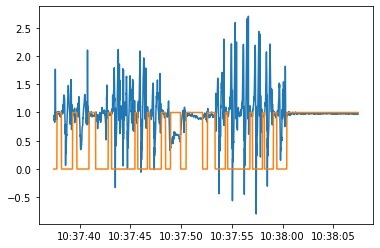

In [41]:

meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
x=(pow(pow(data['gx'][0]-meax2,2)+pow(data['gy'][0]-meay2,2)+pow(data['gz'][0]-meaz2,2),0.5)+pow(pow(data['gx'][1]-meax2,2)+pow(data['gy'][1]-meay2,2)+pow(data['gz'][1]-meaz2,2),0.5)+pow(pow(data['gx'][2]-meax2,2)+pow(data['gy'][2]-meay2,2)+pow(data['gz'][2]-meaz2,2),0.5)+pow(pow(data['gx'][3]-meax2,2)+pow(data['gy'][3]-meay2,2)+pow(data['gz'][3]-meaz2,2),0.5)+pow(pow(data['gx'][4]-meax2,2)+pow(data['gy'][4]-meay2,2)+pow(data['gz'][4]-meaz2,2),0.5))/(5)
arr_tm3 = np.array(x)
arr_tm3=np.append(arr_tm3,x)
i=2;
while(i<=2997):
    meax2= np.mean(data['gx'][i:i+4])
    meay2= np.mean(data['gy'][i:i+4])
    meaz2= np.mean(data['gz'][i:i+4])
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm3=np.append(arr_tm3,x)
    i+=1
arr_tm3=np.append(arr_tm3,x)
arr_tm3=np.append(arr_tm3,x)

data['tm3']=arr_tm3
data['mark_stance3']=(data['tm3']<0.6)
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance3'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance3'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance3'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance3'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance3'])

<ipython-input-44-7179bad134f0>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=0
<ipython-input-44-7179bad134f0>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=1


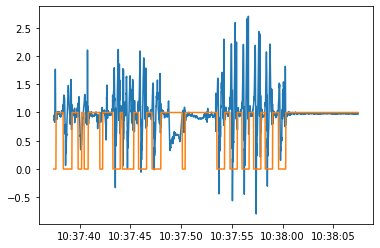

In [44]:
sigmaa=3.054466826258739e-07
sigmaw=4.374101426993713e-05
meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
x=(pow(pow(data['gx'][0]-(meax2/mea2),2)+pow(data['gy'][0]-(meay2/mea2),2)+pow(data['gz'][0]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][1]-(meax2/mea2),2)+pow(data['gy'][1]-(meay2/mea2),2)+pow(data['gz'][1]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][2]-(meax2/mea2),2)+pow(data['gy'][2]-(meay2/mea2),2)+pow(data['gz'][2]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][3]-(meax2/mea2),2)+pow(data['gy'][3]-(meay2/mea2),2)+pow(data['gz'][3]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][4]-(meax2/mea2),2)+pow(data['gy'][4]-(meay2/mea2),2)+pow(data['gz'][4]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][5]-(meax2/mea2),2)+pow(data['gy'][5]-(meay2/mea2),2)+pow(data['gz'][5]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][6]-(meax2/mea2),2)+pow(data['gz'][6]-(meaz2/mea2),2)+pow(data['gy'][6]-(meay2/mea2),2),0.5))/(7*sigmaa)
y=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2)+pow(data['gyro'][5],2)++pow(data['gyro'][6],2))/(7*sigmaw)
z=math.log10(x+y)
arr_tm4 = np.array(z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
i=4;
while(i<=2996):
    meax2= np.mean(data['gx'][i:i+6])
    meay2= np.mean(data['gy'][i:i+6])
    meaz2= np.mean(data['gz'][i:i+6])
    mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
    x=(pow(pow(data['gx'][i-3]-meax2/mea2,2)+pow(data['gy'][i-3]-meay2/mea2,2)+pow(data['gz'][i-3]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-2]-meax2/mea2,2)+pow(data['gy'][i-2]-meay2/mea2,2)+pow(data['gz'][i-2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-1]-meax2/mea2,2)+pow(data['gy'][i-1]-meay2/mea2,2)+pow(data['gz'][i-1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i]-meax2/mea2,2)+pow(data['gy'][i]-meay2/mea2,2)+pow(data['gz'][i]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+1]-meax2/mea2,2)+pow(data['gy'][i+1]-meay2/mea2,2)+pow(data['gz'][i+1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+2]-meax2/mea2,2)+pow(data['gy'][i+2]-meay2/mea2,2)+pow(data['gz'][i+2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+3]-meax2/mea2,2)+pow(data['gy'][i+3]-meay2/mea2,2)+pow(data['gz'][i+3]-meaz2/mea2,2),0.5))/(7*sigmaa)
    y=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(7*sigmaw)
    z=math.log10(x+y)
    arr_tm4=np.append(arr_tm4,z)
    i+=1
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
data['tm4']=arr_tm4

data['mark_stance4']=(data['tm4']<6)
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance4'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance4'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2999):
    k=j
    l=0
    while(j<=2999):
        if data['mark_stance4'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance4'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance4'])

<ipython-input-32-240e715d81d7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=0
<ipython-input-32-240e715d81d7>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=1


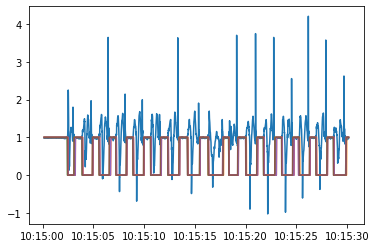

In [32]:
# %matplotlib notebook
z= np.var(data['acc'][0:5])
arr_slipvar=np.array([0,0,0,0,0,z])
i=6
while(i<=2998):
    z=np.var(data['acc'][i-5:i])
    arr_slipvar=np.append(arr_slipvar,z)
    i+=1
data['slipvar']=arr_slipvar
from scipy.signal import find_peaks
x = data['slipvar']
peaks, _ = find_peaks(x, height=0,distance=40)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()
#print(x[peaks])
i=2206
var1=arr_slipvar[i]
while(i<=2262):
    var1=min(arr_slipvar[i],var1)
    i+=1
i=2027
var2=arr_slipvar[i]
while(i<=2083):
    var2=min(arr_slipvar[i],var2)
    i+=1
i=1836
var3=arr_slipvar[i]
while(i<=1897):
    var3=min(arr_slipvar[i],var3)
    i+=1
i=1627
var4=arr_slipvar[i]
while(i<=1667):
    var4=min(arr_slipvar[i],var4)
    i+=1
i=1260
var5=arr_slipvar[i]
while(i<=1317):
    var5=min(arr_slipvar[i],var5)
    i+=1
i=1079
var6=arr_slipvar[i]
while(i<=1137):
    var6=min(arr_slipvar[i],var6)
    i+=1
var7=arr_slipvar[i]
acc_thresh= max(var1,var2,var3,var4,var5,var6)
data['mark_stance5']=(data['slipvar']<=(0.0005))
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance5'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance5'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'], data['Time'],data['mark_stance4'], data['Time'],data['mark_stance3'],data['Time'],data['mark_stance2'], data['Time'],data['mark_stance1'])





In [33]:
#data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
#plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
from sklearn.metrics import accuracy_score
print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.9563187729243081
0.9633211070356785
0.9579859953317773
0.9679893297765922


In [45]:
arr_mean= np.array([data['acc'][0:1]])
i=2
while(i<=2998):
    x= np.mean(data['acc'][i-2:i+2])
    arr_mean=np.append(arr_mean,x)
    i+=1
arr_mean=np.append(arr_mean,x)
arr_mean=np.append(arr_mean,x)
data['mean_acc']=arr_mean
print(data['mean_acc'])

0       1.097293
1       1.067477
2       1.061962
3       1.065065
4       1.074976
          ...   
2995    0.998715
2996    0.998976
2997    0.999381
2998    0.999381
2999    0.999381
Name: mean_acc, Length: 3000, dtype: float64


In [46]:
arr_var= np.array(np.var([data['acc'][0:4]]))
j=2
while(j<=2998):
    x= np.var(data['acc'][j-2:j+2])
    arr_var=np.append(arr_var,x)
    j+=1
arr_var=np.append(arr_var,x)
arr_var=np.append(arr_var,x)
data['var_acc']=arr_var
print(data['var_acc'])

0       0.000350
1       0.000350
2       0.000112
3       0.000175
4       0.000109
          ...   
2995    0.000004
2996    0.000004
2997    0.000002
2998    0.000002
2999    0.000002
Name: var_acc, Length: 3000, dtype: float64


In [47]:
x=np.mean(data['acc'][0:4])
y= ((sum((data['acc'][0:4]-x)**2))/4)**0.5
arr_rmse = np.array(y);
j=2
while(j<=2998):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum((data['acc'][j-2:j+2]-x)**2))/4)**0.5
    arr_rmse=np.append(arr_rmse,y)
    j+=1
arr_rmse=np.append(arr_rmse,y)
arr_rmse=np.append(arr_rmse,y)
data['rmse_acc']=arr_rmse
print(data['rmse_acc'])


0       0.018701
1       0.018701
2       0.010587
3       0.013240
4       0.010448
          ...   
2995    0.002025
2996    0.001883
2997    0.001461
2998    0.001461
2999    0.001461
Name: rmse_acc, Length: 3000, dtype: float64


In [48]:
x= np.mean(data['acc'][0:4])
y= ((sum(abs(data['acc'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=2998):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum(abs(data['acc'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_acc']=arr_mae
print(data['mae_acc'])


0       0.014915
1       0.014915
2       0.009400
3       0.012503
4       0.008357
          ...   
2995    0.001771
2996    0.001510
2997    0.001228
2998    0.001228
2999    0.001228
Name: mae_acc, Length: 3000, dtype: float64


In [49]:
x= np.mean(data['gyro'][0:4])
y= ((sum(abs(data['gyro'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=2998):
    x=np.mean(data['gyro'][j-2:j+2])
    y= ((sum(abs(data['gyro'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_gyro']=arr_mae
print(data['mae_gyro'])

0       0.126792
1       0.126792
2       0.124833
3       0.140889
4       0.149725
          ...   
2995    0.004758
2996    0.005680
2997    0.004696
2998    0.004696
2999    0.004696
Name: mae_gyro, Length: 3000, dtype: float64


In [50]:
arr_q= np.array(data['acc'])
arr_q=sorted(arr_q)
Q3_acc = np.median(arr_q[1499:])
print(Q3_acc)

1.1536910950119483


In [51]:
arr_q= np.array(data['gyro'])
arr_q=sorted(arr_q)
Q3_gyro = np.median(arr_q[1499:])
print(Q3_gyro)

2.2177788187411323


In [52]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)

[[ 1.          0.20185889 -0.09046866  0.07444351  0.08111768 -0.04664122]
 [ 0.20185889  1.         -0.35099289 -0.05354889  0.03885859 -0.0538984 ]
 [-0.09046866 -0.35099289  1.         -0.13090702 -0.07902316  0.08431389]
 [ 0.07444351 -0.05354889 -0.13090702  1.         -0.04747358 -0.45471141]
 [ 0.08111768  0.03885859 -0.07902316 -0.04747358  1.          0.66289829]
 [-0.04664122 -0.0538984   0.08431389 -0.45471141  0.66289829  1.        ]]


In [53]:
import seaborn as sns
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'], data['acc'], data['gyro'], data['mean_acc'], data['var_acc'], data['rmse_acc'],data['mae_acc'], data['mae_gyro']])
arr6=np.corrcoef(arr5)
print(arr6)

[[ 1.          0.20185889 -0.09046866  0.07444351  0.08111768 -0.04664122
   0.76283713  0.35356675  0.75061194  0.17762787  0.23101614  0.23768575
   0.02652004]
 [ 0.20185889  1.         -0.35099289 -0.05354889  0.03885859 -0.0538984
   0.44031428  0.17007868  0.4429883  -0.00886968  0.05948931  0.05035377
   0.08404269]
 [-0.09046866 -0.35099289  1.         -0.13090702 -0.07902316  0.08431389
  -0.45230099 -0.08544992 -0.47900202  0.04647414  0.00645894  0.01513306
  -0.22982841]
 [ 0.07444351 -0.05354889 -0.13090702  1.         -0.04747358 -0.45471141
   0.11427367 -0.17381447  0.10806148  0.13576546  0.20665873  0.20453164
   0.07524193]
 [ 0.08111768  0.03885859 -0.07902316 -0.04747358  1.          0.66289829
   0.10352739  0.37040717  0.1432773  -0.08924064 -0.05982913 -0.05721926
  -0.01091775]
 [-0.04664122 -0.0538984   0.08431389 -0.45471141  0.66289829  1.
  -0.04780714  0.40554493 -0.01995994 -0.12680088 -0.11580549 -0.11068492
   0.00842835]
 [ 0.76283713  0.44031428 -0.45

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
data.dropna(how='all', axis=1, inplace=True)
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data.head()

,gx,gy,gz,gyx,gyy,gyz,thetax,thetay,thetaz,vx,...,tm2,mark_stance2,tm3,mark_stance3,tm4,mark_stance4,mean_acc,var_acc,rmse_acc,mae_acc
0,957.0,0.348379,-0.434298,-0.226261,0.969430,0.602190,-0.002236,0.009503,0.005938,0.009427,...,0.839296,False,0.037122,False,5.523118,False,1.097293,0.000350,0.018701,0.014915
1,613.0,0.345753,-0.455962,-0.187025,0.842937,0.539810,-0.001824,0.008248,0.005283,0.008931,...,0.839296,False,0.037122,False,5.523118,False,1.067477,0.000350,0.018701,0.014915
2,486.0,0.345597,-0.464276,-0.127847,0.725312,0.505164,-0.001211,0.007085,0.004919,0.008632,...,0.614739,False,0.839296,False,5.523118,False,1.061962,0.000112,0.010587,0.009400
3,499.0,0.369927,-0.462890,-0.088266,0.603524,0.488553,-0.000808,0.005895,0.004944,0.008738,...,0.429493,False,0.614739,False,5.613129,False,1.065065,0.000175,0.013240,0.012503
4,498.0,0.417095,-0.461940,-0.052705,0.470928,0.416008,-0.000482,0.004527,0.004096,0.008758,...,0.278910,False,0.429493,False,5.632172,False,1.074976,0.000109,0.010448,0.008357


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# X=data.drop({'mark_stance5','Time','vx','vy','vz','thetax','thetay','thetaz'},axis='columns')
# y=data['mark_stance5']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
# print("X_train:", X_train.shape) # X_train
# print("X_test:",X_test.shape) # X_test
# print("y_train:",y_train.shape) # y_train
# print("y_test:",y_test.shape) # y_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# classification=LogisticRegression(random_state=2021)
# classification.fit(X_train_scaled,y_train)
# y_predict=classification.predict(X_test_scaled)
# y_predict



<AxesSubplot:>

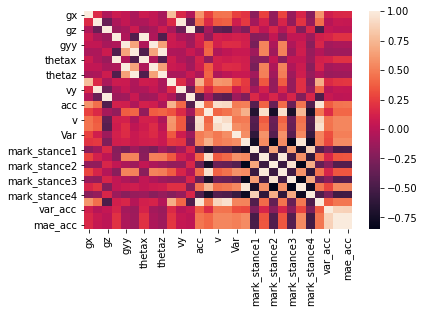

In [56]:

import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [57]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [58]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values
print(selected_columns)

['gy' 'gz' 'gyx' 'gyy' 'gyz' 'vx' 'acc' 'gyro' 'Var' 'tm1' 'mark_stance1'
 'mark_stance2' 'mark_stance4' 'var_acc' 'rmse_acc']


In [59]:
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                    
    regressor_OLS.summary()
    return x, columns

In [60]:
SL = 0.01
Y=data.iloc[:,1:].values
Y=np.array(Y, dtype=float)
X_opt=data.iloc[:,0].values
X_opt = np.array(X_opt, dtype=float)
data_modeled, selected_columns = backwardElimination(Y,X_opt, SL, selected_columns)
print(selected_columns)

['gz' 'gyz' 'vx' 'acc' 'tm1' 'mark_stance2' 'mark_stance4' 'rmse_acc']


In [61]:

data.describe()

,gx,gy,gz,gyx,gyy,gyz,vx,acc,gyro,Var,tm1,var_acc,rmse_acc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3000.000000
mean,1499.500000,0.267995,-0.233810,-0.083102,-0.054576,0.052532,0.009921,1.135538,1.421591,1.101724e-05,3.807302,1.250586e-02,0.052361
std,866.169729,0.283025,0.382138,1.013514,1.702803,0.755727,0.003214,0.377721,1.577633,2.227711e-05,1.798208,5.833982e-02,0.098830
min,0.000000,-2.940099,-2.635513,-4.997886,-5.078764,-3.363599,-0.013192,0.087003,0.002907,5.877215e-09,-0.073505,1.021656e-08,0.000101
25%,749.750000,0.172140,-0.318209,-0.154716,-0.767124,-0.295914,0.009233,0.995217,0.183005,4.671310e-07,2.314719,9.132584e-06,0.003022
50%,1499.500000,0.226300,-0.179514,-0.010665,-0.135437,-0.009822,0.009769,1.005430,0.743611,8.161277e-07,3.847251,2.042311e-04,0.014291
75%,2249.250000,0.369429,-0.092050,0.139450,0.014805,0.159922,0.010151,1.153797,2.217799,1.128657e-05,5.432097,3.489733e-03,0.059074
max,2999.000000,3.976662,1.668042,4.148582,6.430784,2.794076,0.029912,3.977288,6.746009,1.470446e-04,7.235045,1.350244e+00,1.162000


In [62]:
data.isna().sum()

gx              0
gy              0
gz              0
gyx             0
gyy             0
gyz             0
vx              0
acc             0
gyro            0
Var             0
tm1             0
mark_stance1    0
mark_stance2    0
mark_stance4    0
var_acc         0
rmse_acc        0
dtype: int64

In [64]:
X=data.drop(['mark_stance1','mark_stance4','mark_stance2','tm1'],axis='columns')
y=data['mark_stance1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


In [65]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test


X_train: (2250, 12)
X_test: (750, 12)
y_train: (2250,)
y_test: (750,)


In [66]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [67]:
classification=LogisticRegression(random_state=2021)
classification.fit(X_train_scaled,y_train)
y_predict=classification.predict(X_test_scaled)
y_predict

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True,

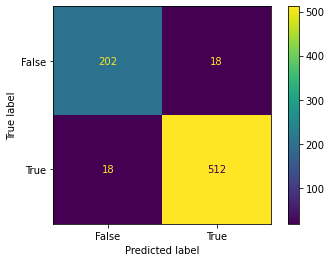

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
plot_confusion_matrix(classification, X_test_scaled, y_test)

In [69]:
accuracy_score(y_test,y_predict)

0.952

In [70]:
from sklearn import svm
clf=svm.SVC(C=50,gamma='scale')
clf.fit(X_train_scaled,y_train)
y_predict=clf.predict(X_test_scaled)
y_predict

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True,

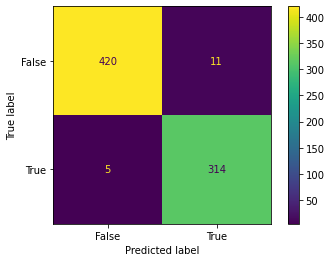

In [79]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

In [80]:
accuracy_score(y_test,y_predict)

0.9786666666666667